# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import os
import pandas as pd

def addToDF(foodType):
    """
    Function to return a list to input into a pandas dataframe.
    Input: Type of food, vegetable or fruit
    Output: list with all the rows for that food added.
    """
    foodDF = []
    foodFolder = os.listdir('./assignment3_data/' + foodType)
    for file in foodFolder:    
        f = pd.read_excel('./assignment3_data/' + foodType + '/' + file)
        food, _ = file.split(".")
        #Look through each row, see if Fresh1 is in there
        for i in range(len(f)):
            #If any of the strings contain Fresh1 or Fresh retrieve row
            string = str(f.iloc[i,0])
            if string.lower().startswith("fresh", 0, len(string)):
                goalString = f.iloc[i,:]
                foodDF.append([foodType, food, goalString[0], 
                              goalString[1], goalString[3], 
                              goalString[4], goalString[6]])

    return(foodDF)

In [2]:
fruitDF = pd.DataFrame(addToDF("fruit"), 
                       columns=['type','food','form','price_per_lb','preparation_yield','lb_per_cup','price_per_cup'])

__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [3]:
vegetableDF = pd.DataFrame(addToDF("vegetables"), 
                           columns=['type','food','form','price_per_lb','preparation_yield','lb_per_cup','price_per_cup'])

My code does not produce the correct prices for tomatoes, since I only extract the line in which contains the term "Fresh" or "Fresh1". In the case of tomatoes file, the line with "Fresh" does not contain any pricing information, therefore NaN is returned. Other files with same problem as the tomato file is listed below.

In [4]:
vegetableDF.loc[vegetableDF.isnull().any(axis=1)]

,type,food,form,price_per_lb,preparation_yield,lb_per_cup,price_per_cup
0,vegetables,tomatoes,Fresh,NaN,NaN,NaN,NaN
2,vegetables,lettuce_romaine,Fresh1,,NaN,,NaN
3,vegetables,celery,Fresh1,NaN,NaN,NaN,NaN
7,vegetables,spinach,Fresh1,NaN,NaN,NaN,NaN
9,vegetables,broccoli,Fresh,,,,NaN
11,vegetables,mushrooms,Fresh1,NaN,NaN,NaN,NaN
13,vegetables,carrots,Fresh,NaN,NaN,NaN,NaN
26,vegetables,cauliflower,Fresh1,,,,NaN


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [5]:
vegetableDF = vegetableDF.dropna()
foodDF = pd.concat([fruitDF.copy(), vegetableDF.copy()], ignore_index = True)
foodDF = foodDF[['type','food', 'form', 'price_per_lb', 'preparation_yield', 'lb_per_cup', 'price_per_cup']]
foodDF.iloc[:,3:7] = foodDF.iloc[:,3:7].apply(pd.to_numeric)
foodDF.dtypes

type                  object
food                  object
form                  object
price_per_lb         float64
preparation_yield    float64
lb_per_cup           float64
price_per_cup        float64
dtype: object

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

#### What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?

In [6]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
import numpy as np
df = foodDF.loc[foodDF['type'] == 'fruit'].ix[:,['food', 'price_per_lb',]]
print("""Most expensive fruit (per pound) is %s, valuing at %.2f. 
Least expensve fruit (per pound) is %s, valueing at %.2f.""" % 
      (df.max()[0], df.max()[1], df.min()[0], df.min()[1]))

Most expensive fruit (per pound) is watermelon, valuing at 6.98. 
Least expensve fruit (per pound) is apples, valueing at 0.33.


#### How do the price distributions compare for fruit and vegetables?

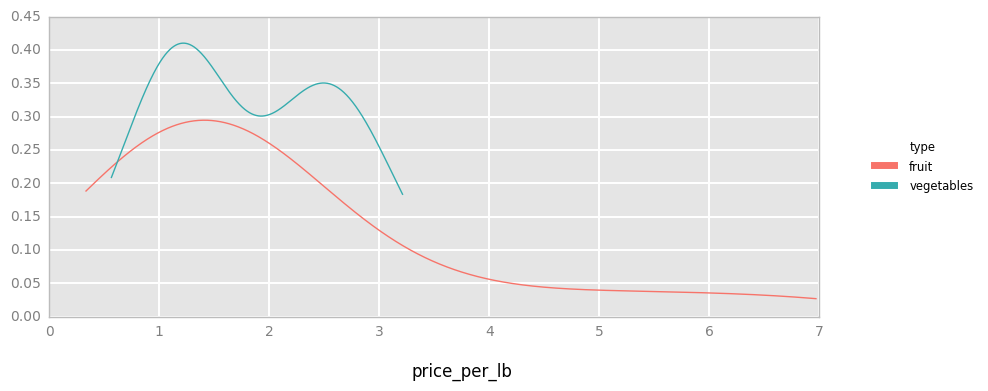

<ggplot: (8754886587161)>


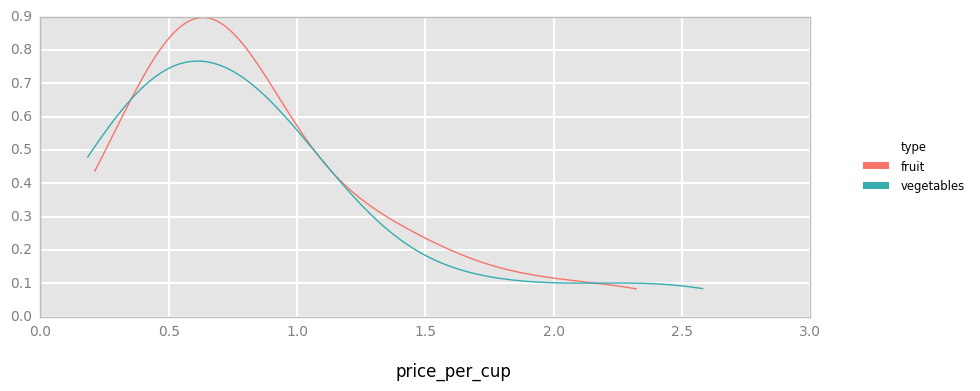

<ggplot: (8754886587161)>


In [7]:
from ggplot import *
df = foodDF.ix[:,["type","price_per_lb","price_per_cup"]]
print(ggplot(df, aes(x = "price_per_lb", color = "type")) + geom_density() + theme(plot_margin = dict(right = .5, top=.5)))
print(ggplot(df, aes(x = "price_per_cup", color = "type")) + geom_density() + theme(plot_margin = dict(right = .5, top=.5)))

There is more variance in the price of fruit than the price of vegetables per lb.
Price of vegetables per lb follows a slight bimodal distribution compare to price of fruit per lb.
Price of fruit per lb has a heavy left tail. For price of fruit and vegetables per cup, they follow a similar distribution.

#### Which foods are the best value for the price?

Preparation yield factor is a method for calculating nutrient within food depending on the type of food prep. It also tells how much you will have of a finished or processed product. Food that give the best price for value should maxmize yield and minimize cost. 

In [8]:
df = foodDF.ix[:,["type","price_per_lb","preparation_yield","food"]]
tmp = pd.concat([df["food"], df["preparation_yield"]/df["price_per_lb"]], axis = 1, keys= ["food", "price_per_cup"])
tmp.max()

food             watermelon
price_per_cup       1.55963
dtype: object

Food that gives best price should be one that minimize cost and maxmize yield. Taking the max of yield/price, we get watermelon as the food that offers the most yield for price. 

#### What's something surprising about this data set?

One suprising thing about this dataframe is that price_per_cup is not a product of price_per_lb and lb_per_cup. So the numbers aren't derived from the other columns. Also, we expect yield to be a percentage, but some values are greater than 1. I am not sure if that's a calculation error or something else.

#### Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

Yield can be representative of nutrition. So the food that provide the best combination of price, yield, and nutrition should be that minimize price, maxmize yield. Looking at the actual excel file, it seem that price_per_cup will give us a measure that utilizes price_per_lb, yield, and lb_per_cup. So the minimum of this should provide us the best combination. Specifically the formula is: 

price_per_cup = price_per_lb*lb_per_cup/yield

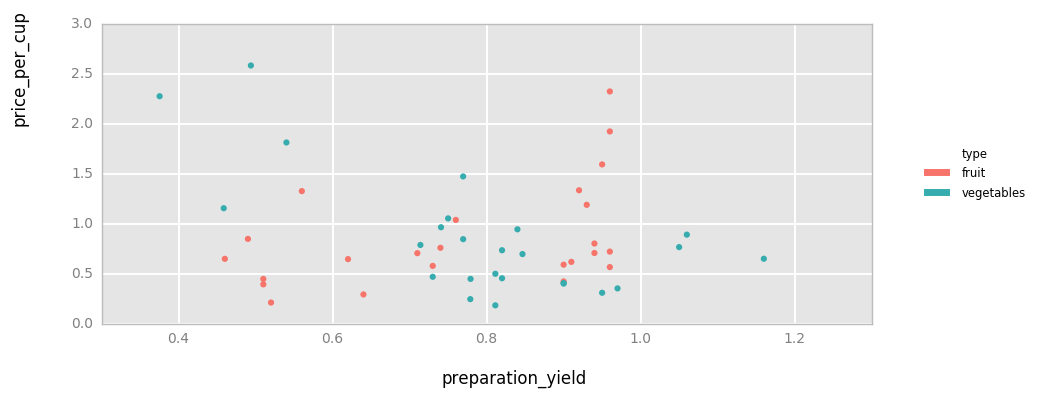

<ggplot: (8774027892801)>
food             acorn_squash
price_per_cup        0.184017
dtype: object


In [51]:
print(ggplot(foodDF, aes(x = "preparation_yield", y = "price_per_cup", color = "type" )) + geom_point() + theme(plot_margin = dict(right = .5, top=.5)))
print(foodDF[["food", "price_per_cup"]].min())

Base off the way price_per_cup is formulated, I believe acorn_squash provides the best combination of price, yield, and nutrition. By the color clusters, in general it seems like vegetables provide a better yield and price ratio. In other words, you get more for what you pay. 